<a href="https://colab.research.google.com/github/BaeSang1/Study/blob/main/202304/python230417.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## matplotlib + Seaborn


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tips = sns.load_dataset("tips")     # 데이터 불러오기
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
from matplotlib.ticker import(MultipleLocator, AutoMinorLocator, FuncFormatter)
def major_formatter(x, pos):        # 
    return "%.2f$" % x

formatter = FuncFormatter(major_formatter)

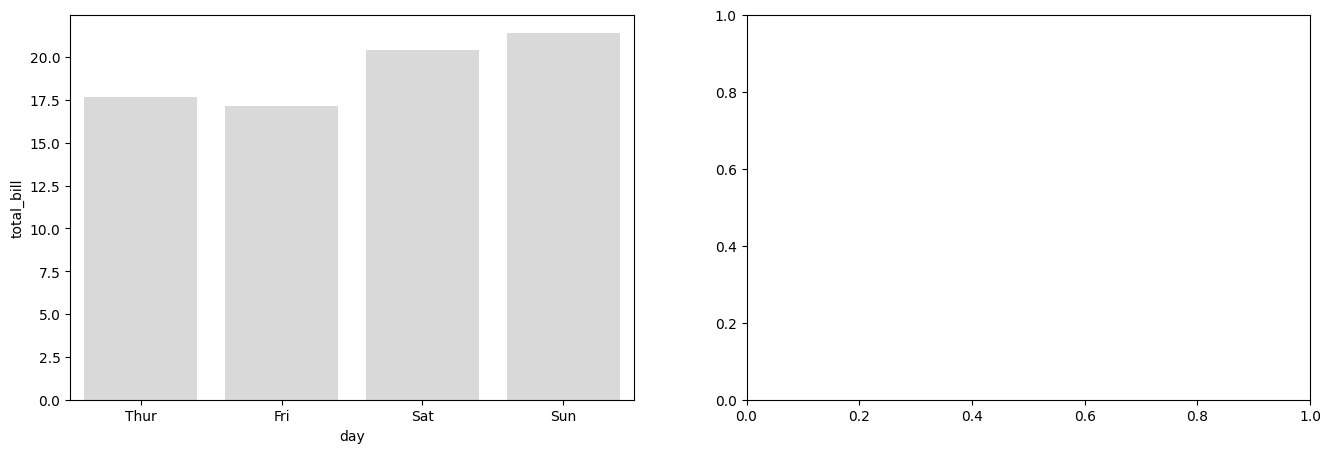

In [10]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
sns.barplot(x="day"
            , y="total_bill"
            , data = tips
            , errorbar = None
            , color = "lightgray"
            , alpha = 0.85
            , ax = ax[0]
            )


plt.show()

In [30]:
group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)

h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0],2)
print(h_day,h_mean)

Sun 21.41


Sun 21.41


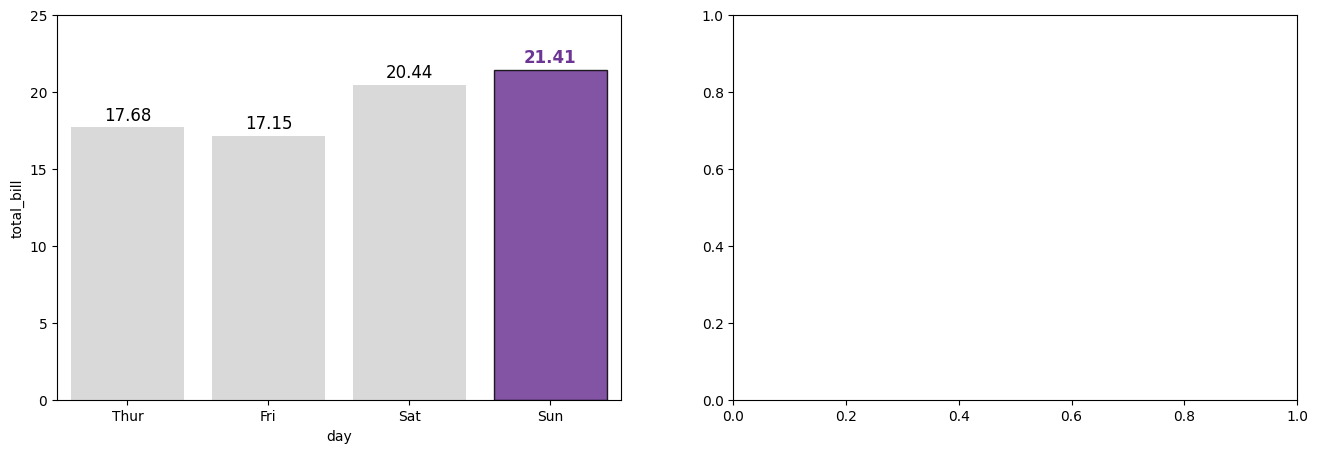

In [43]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax0 = sns.barplot(x="day"
            , y="total_bill"
            , data = tips
            , errorbar = None
            , color = "lightgray"
            , alpha = 0.85
            , ax = ax[0]
            )


h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0],2)
print(h_day,h_mean)

for p in ax0.patches:
    fontweight = 'normal'
    color =  "black"
    height = np.round(p.get_height(),2)
    if height == h_mean:
        fontweight = "heavy"
        color = "#6D3594"
        p.set_facecolor(color)
        p.set_edgecolor("black")

    ax0.text(p.get_x() + p.get_width()/2.
             , height+0.5
             , height
             , ha = "center"
             , size = 12
             , fontweight = fontweight
             , color = color)

ax0.set_ylim(0,25)
plt.show()

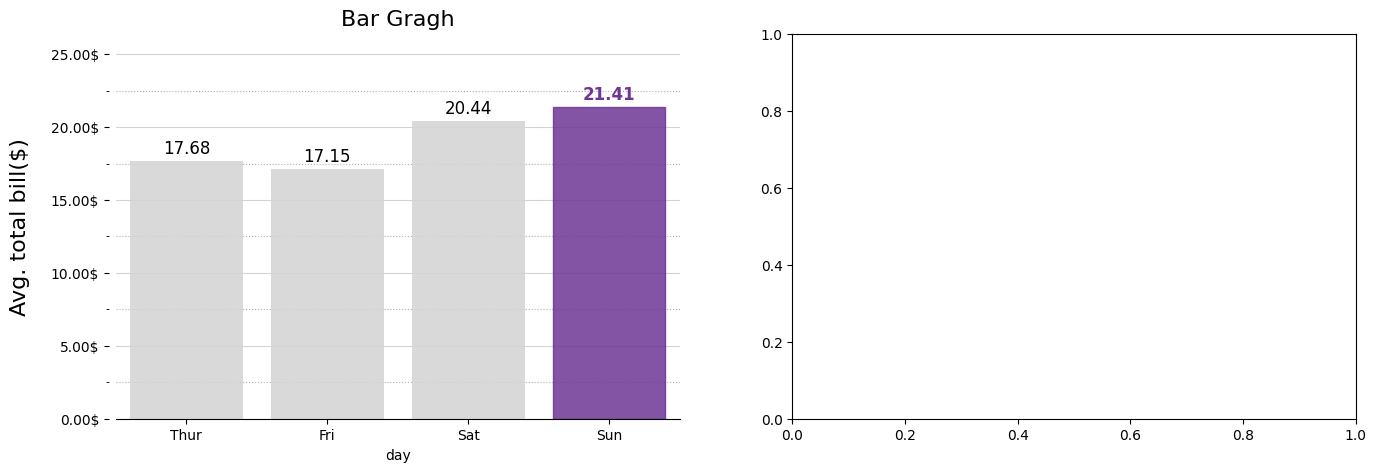

In [80]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax0 = sns.barplot(x="day"
            , y="total_bill"
            , data = tips
            , errorbar = None
            , color = "lightgray"
            , alpha = 0.85
            , zorder = 2
            , ax = ax[0]
            )


h_day = group_mean.sort_values(ascending=False).index[0]
h_mean = np.round(group_mean.sort_values(ascending=False).values[0],2)
# print(h_day,h_mean)

for p in ax0.patches:
    fontweight = 'normal'
    color =  "black"
    height = np.round(p.get_height(),2)
    if height == h_mean:
        fontweight = "heavy"
        color = "#6D3594"
        p.set_facecolor(color)
        p.set_edgecolor("#6D3594")

    ax0.text(p.get_x() + p.get_width()/2.
             , height+0.5
             , height
             , ha = "center"
             , size = 12
             , fontweight = fontweight
             , color = color)

ax0.set_ylim(0,h_mean+5)
ax0.set_title("Bar Gragh", size=16)

ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_position(("outward",5))
ax0.spines["left"].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(5))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(2.5))

ax0.set_ylabel("Avg. total bill($)", fontsize = 16, labelpad= 15.0, loc = "center")

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls = ":")

plt.show()

<ipython-input-1-0ce79074bb95>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,


Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


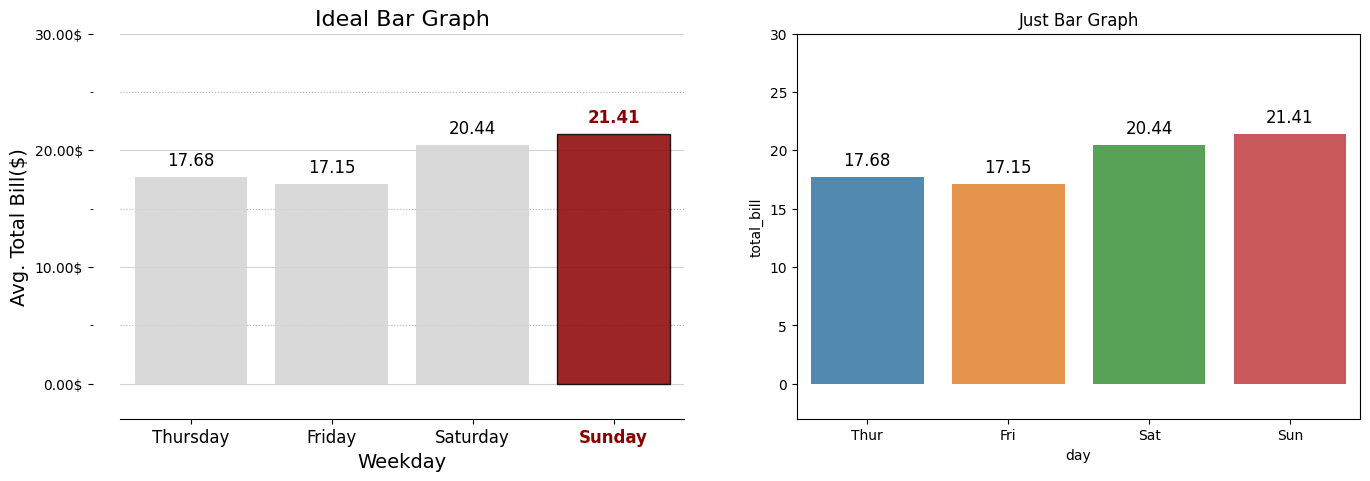

In [1]:
# Matplotlib 실습

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

# 데이터 불러오기
tips = sns.load_dataset("tips")

# 시각화 객체지향선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16, 5))

def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

# Ideal Bar Graph
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  ci=None, color='lightgray', alpha=0.85, zorder=2, 
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')   # 날짜로 그룹화하여 tital_bill의 평균 구하기
h_day = group_mean.sort_values(ascending=False).index[0]   # 날짜 내림차순
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2)   # total_bill 평균 내림차순

# 참고 링크 : https://suy379.tistory.com/148
for p in ax0.patches:     # patches = 모든 그래프의 정보를 나타낸다
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)   # 각 그래프의 높이를 height로 변수지정
  if h_mean == height:   # 그래프 중 높이 height가 가장 큰 값인 h_mean과 같은지 확인
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',  # 텍스트 위치 잡기
           size=12, 
           fontweight=fontweight, color=color)

ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

ax0.yaxis.set_major_locator(MultipleLocator(10))    # y기준 값 구간 설정
ax0.yaxis.set_major_formatter(formatter)            # 위의 major_formatter 함수를 실행하여 y값의 이름 지정
ax0.yaxis.set_minor_locator(MultipleLocator(5))     # y의 세부 구간 설정

ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips, 
                  errorbar=None, alpha=0.85, 
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")

fig.show()

# plotly

In [81]:
import pandas as pd

df = pd.DataFrame({
  "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
  "Contestant": ["Alex", "Alex", "Alex", "Jordan", "Jordan", "Jordan"],
  "Number Eaten": [2, 1, 3, 1, 3, 2],
})
df

,Fruit,Contestant,Number Eaten
0,Apples,Alex,2
1,Oranges,Alex,1
2,Bananas,Alex,3
3,Apples,Jordan,1
4,Oranges,Jordan,3
5,Bananas,Jordan,2


In [82]:
import plotly
print(plotly.__version__)

5.13.1


In [88]:
# plotly.grapg_objects
import plotly.graph_objects as go
fig = go.Figure()
for contestant, group in df.groupby("Contestant"):
    fig.add_trace(go.Bar(x=group["Fruit"], y=group["Number Eaten"],
                         name=contestant,
                         hovertemplate="Contestant=%s<br>Fruit=%%{x}<br>Number Eaten=%%{y}<extra></extra>"% contestant))

fig.update_layout(title = "graph_objects Plot", legend_title_text = "Contestant")
fig.update_xaxes(title_text = "Fruit")
fig.update_yaxes(title_text = "Number Eaten")

fig.show()

- graph_objects와 express의 차이를 알아보자


Link : https://plotly.com/python/graph-objects/

In [89]:
# express
import  plotly.express as px
fig = px.bar(df, x = "Fruit", y = "Number Eaten",
             color = "Contestant", barmode = "group")
fig.update_layout(title = "Express Chart")

fig.show()  

# 결과값이 더 간략하게 나온다
# 위 그래프와 matplotlib와 seaborn간의 관계와 같다고 보면 됨
# return 값은 graph_objects 형식

## 데이터 불러오기
- raw_sales.csv 파일 불러오기

In [10]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [11]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/연세IT/data/'
DATA_PATH

'/content/drive/MyDrive/Colab Notebooks/2023/연세IT/data/'

In [15]:
sale = pd.read_csv(DATA_PATH + 'raw_sales.csv', parse_dates = ["datesold"])
sale.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07,2607,525000,house,4
1,2007-02-27,2906,290000,house,3
2,2007-03-07,2905,328000,house,3
3,2007-03-09,2905,380000,house,4
4,2007-03-21,2906,310000,house,3


In [16]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [64]:
# 컬럼명 : year / year 추출
# groupby 연산, 기준컬럼 year, 대상컬럼 : price, 평균
import numpy as np
import pandas as pd

sale['year'] = sale['datesold'].dt.year
result = np.round(sale.groupby('year')['price'].agg('mean'),2)

result = result.reset_index()
pd.DataFrame(result)

,year,price
0,2007,522377.21
1,2008,493814.16
2,2009,496092.03
3,2010,559564.81
4,2011,566715.11
5,2012,552501.37
6,2013,553416.30
7,2014,592653.76
8,2015,626101.34
9,2016,635185.31


In [65]:
import plotly.express as px

fig= px.line(result, x = "year", y = "price")
fig.show()

- 연도별로 / 월별추세

In [114]:
import pandas as pd
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2023/연세IT/data/'

sales = pd.read_csv(DATA_PATH + 'raw_sales.csv', parse_dates = ["datesold"])
sales['year'] = sales['datesold'].dt.year
sales['month'] = sales['datesold'].dt.month
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datesold      29580 non-null  datetime64[ns]
 1   postcode      29580 non-null  int64         
 2   price         29580 non-null  int64         
 3   propertyType  29580 non-null  object        
 4   bedrooms      29580 non-null  int64         
 5   year          29580 non-null  int64         
 6   month         29580 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 1.6+ MB


In [115]:
sales.head(1)

,datesold,postcode,price,propertyType,bedrooms,year,month
0,2007-02-07,2607,525000,house,4,2007,2


In [116]:
# 2008,2018년 데이터만 추출
# sales[(sales['year']==2008) | (sales['year']==2018)]
# 위 코드가 가독성이 떨어져서 isin 연산자가 탄생함

result = sales[sales["year"].isin([2008,2018])]
result.head()

,datesold,postcode,price,propertyType,bedrooms,year,month
130,2008-01-02,2906,309000,house,2,2008,1
131,2008-01-14,2602,413000,house,3,2008,1
132,2008-01-15,2905,445000,house,4,2008,1
133,2008-01-15,2902,600000,house,4,2008,1
134,2008-01-17,2605,417500,house,2,2008,1


In [117]:
result = np.round(result.groupby(['year','month'])['price'].agg(np.mean).reset_index(),2)
result

,year,month,price
0,2008,1,504428.57
1,2008,2,531080.00
2,2008,3,563500.00
3,2008,4,534204.55
4,2008,5,522394.74
5,2008,6,539092.65
6,2008,7,537453.12
7,2008,8,449510.42
8,2008,9,496778.65
9,2008,10,454822.04


In [118]:
import plotly.express as px

fig = px.line(result,x='month',y='price',color='year')

fig.update_layout({
    'plot_bgcolor' : 'rgba(0,0,0,0)',     # 그래프가 그려지는 화면 (하양색 설정)
    'paper_bgcolor' : 'rgba(0,0,0,0)'     # 그래프 밖 사이드 포함 전체화면 (하양색 설정)
})
fig.show()

In [119]:
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly_white'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [120]:
import plotly.express as px
pio.templates.default = "plotly_white"

fig = px.line(result,x='month',y='price',color='year')
fig.update_layout({
    # dictionary
})   # plotly 데이터가 보통 JSON형태로 들어감 그래서 딕셔너리로 설정
fig.show()

## 막대 그래프

In [121]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as plo
pio.templates.default = "plotly_white"

fig = make_subplots(rows=2,
                    cols=1, 
                    subplot_titles = ("1 Chart","2 Chart"))

for i, year in enumerate([2008,2018]):
    data = result[result['year']==year]
    fig.add_trace(go.Bar(x=data['month']
                         , y = data['price']
                         , name = str(year))
                  , row = i+1
                  , col=1)

fig.show()

In [129]:
# px.box()
# x축 : 2007, 2008, 2009, 2010년
# y축 : price
# propertyType : house, unit

# result = sales[sales['year'].isin([2007,2008,2009,2010])]
# fig = px.box(result, x= 'year', y='price', color = 'propertyType')
# fig.show()

result = sales[sales['year'].isin([2007, 2008, 2009, 2010])] 
result = result[result['price'] <= 2000000]
fig = px.box(result, x = 'year', y = 'price', color='propertyType')
fig.show()